In [1]:
#  add karna-python-backend to the path
import sys
sys.path.append('C:/Users/Prince/Documents/GitHub/Proejct-Karna/offline-ai-assistant/karna-python-backend')

from importlib import reload  # Not needed in Python 2
import logging
reload(logging)
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')

logger = logging.getLogger(__name__)

import os
import json
from typing import List
from datetime import datetime
from config.paths import workspace_data_dir, workspace_dir
from omni_helper import get_omniparser_inference_data, OmniParserResultModel
from services.screen_capture_service import ScreenshotEvent

02:07:45 INFO:NumExpr defaulting to 12 threads.


In [6]:
def run_omniparser_inference(json_file_path: str):
    logger.info(f"Loading screenshot events from JSON file: {json_file_path}")
        
    if not os.path.exists(json_file_path):
        raise FileNotFoundError(f"JSON file not found: {json_file_path}")
    
    try:
        with open(json_file_path, 'r', encoding='utf-8') as f:
            events_data = json.load(f)
    except json.JSONDecodeError as e:
        raise ValueError(f"Invalid JSON in file: {str(e)}")
    
    if not events_data or not isinstance(events_data, list):
        raise ValueError("JSON file does not contain a list of screenshot events")
    
    # Convert JSON data to ScreenshotEvent objects
    screenshot_events = []
    for event_dict in events_data:
        # Convert ISO format string back to datetime
        if 'timestamp' in event_dict:
            event_dict['timestamp'] = datetime.fromisoformat(event_dict['timestamp']) # type: ignore
        
        screenshot_path = event_dict["screenshot_path"]
        # convert screenshot_path to proper path using paths config
        screenshot_path = workspace_dir / screenshot_path
        event_dict["screenshot_path"] = screenshot_path
        # Create ScreenshotEvent object
        try:
            event = ScreenshotEvent(**event_dict)
            screenshot_events.append(event)
        except (TypeError, ValueError) as e:
            logger.warning(f"Skipping invalid event: {str(e)}")
    
    logger.info(f"Loaded {len(screenshot_events)} screenshot events from JSON file")
    return get_omniparser_inference_data(screenshot_events, caption_icons=False)

In [7]:

omni_inference_data : list[OmniParserResultModel] = run_omniparser_inference(os.path.join(workspace_data_dir, 
                                                                        'youtube.com/123e4567-e89b-12d3-a456-426614174000/screenshot_events_123e4567-e89b-12d3-a456-426614174000.json'
                                                                        )).omniparser_result_models



02:09:31 INFO:Loading screenshot events from JSON file: C:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\data\youtube.com/123e4567-e89b-12d3-a456-426614174000/screenshot_events_123e4567-e89b-12d3-a456-426614174000.json
02:09:31 INFO:Loaded 3 screenshot events from JSON file
c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
02:09:38 INFO:Parsing image path: C:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\data\youtube.com\123e4567-e89b-12d3-a456-426614174000\screenshots\raw\screenshot_20250326_143829_417705.png


Omniparser initialized!!!
image size: (1920, 1080)

0: 736x1280 125 icons, 72.7ms
Speed: 11.1ms preprocess, 72.7ms inference, 2.0ms postprocess per image at shape (1, 3, 736, 1280)
len(filtered_boxes): 161 92
time to get parsed content: 0.0


02:09:43 INFO:Created omniparser result for event_id: b3990744-6b26-4c03-a701-4d89da0959a4
02:09:43 INFO:Getting omniparser result model for event_id: b3990744-6b26-4c03-a701-4d89da0959a4
02:09:43 INFO:Converting parsed content df to bounding boxes for event_id: b3990744-6b26-4c03-a701-4d89da0959a4
02:09:43 INFO:Creating omniparser result model for event_id: b3990744-6b26-4c03-a701-4d89da0959a4
02:09:43 INFO:Created omniparser result model for event_id: b3990744-6b26-4c03-a701-4d89da0959a4
02:09:43 INFO:Parsing image path: C:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\data\youtube.com\123e4567-e89b-12d3-a456-426614174000\screenshots\raw\screenshot_20250326_143833_369730.png


image size: (1920, 1080)

0: 736x1280 138 icons, 72.2ms
Speed: 12.0ms preprocess, 72.2ms inference, 2.0ms postprocess per image at shape (1, 3, 736, 1280)
len(filtered_boxes): 181 101
time to get parsed content: 0.0


02:09:47 INFO:Created omniparser result for event_id: 9ec1aeed-aaed-4ee9-aa7f-2f5f6398ee67
02:09:47 INFO:Getting omniparser result model for event_id: 9ec1aeed-aaed-4ee9-aa7f-2f5f6398ee67
02:09:47 INFO:Converting parsed content df to bounding boxes for event_id: 9ec1aeed-aaed-4ee9-aa7f-2f5f6398ee67
02:09:47 INFO:Creating omniparser result model for event_id: 9ec1aeed-aaed-4ee9-aa7f-2f5f6398ee67
02:09:47 INFO:Created omniparser result model for event_id: 9ec1aeed-aaed-4ee9-aa7f-2f5f6398ee67
02:09:47 INFO:Parsing image path: C:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\data\youtube.com\123e4567-e89b-12d3-a456-426614174000\screenshots\raw\screenshot_20250326_143836_279062.png


image size: (1920, 1080)

0: 736x1280 132 icons, 71.1ms
Speed: 11.6ms preprocess, 71.1ms inference, 0.0ms postprocess per image at shape (1, 3, 736, 1280)
len(filtered_boxes): 157 87
time to get parsed content: 0.0


02:09:50 INFO:Created omniparser result for event_id: f92bd212-b132-4e30-a1bc-0a94ad394223
02:09:50 INFO:Getting omniparser result model for event_id: f92bd212-b132-4e30-a1bc-0a94ad394223
02:09:50 INFO:Converting parsed content df to bounding boxes for event_id: f92bd212-b132-4e30-a1bc-0a94ad394223
02:09:50 INFO:Creating omniparser result model for event_id: f92bd212-b132-4e30-a1bc-0a94ad394223
02:09:50 INFO:Created omniparser result model for event_id: f92bd212-b132-4e30-a1bc-0a94ad394223
02:09:50 INFO:Completed getting omniparser result models for 3 events


In [8]:
logger.info(f"Loaded {len(omni_inference_data)} omniparser result models")

02:10:29 INFO:Loaded 3 omniparser result models


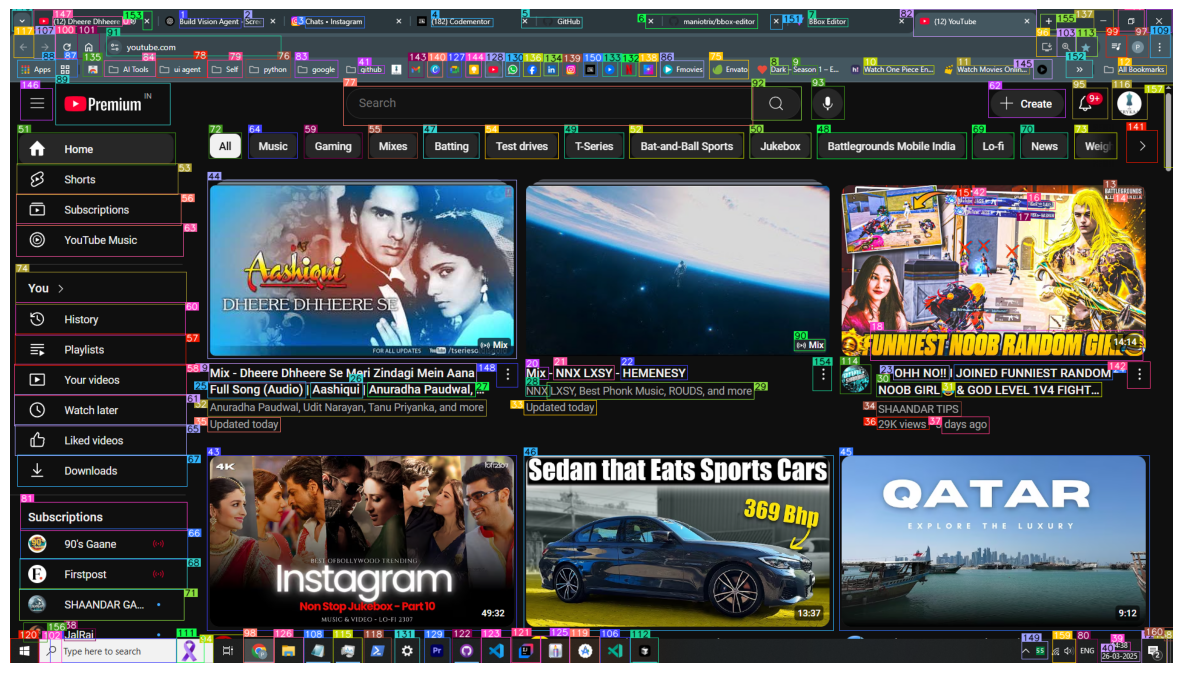

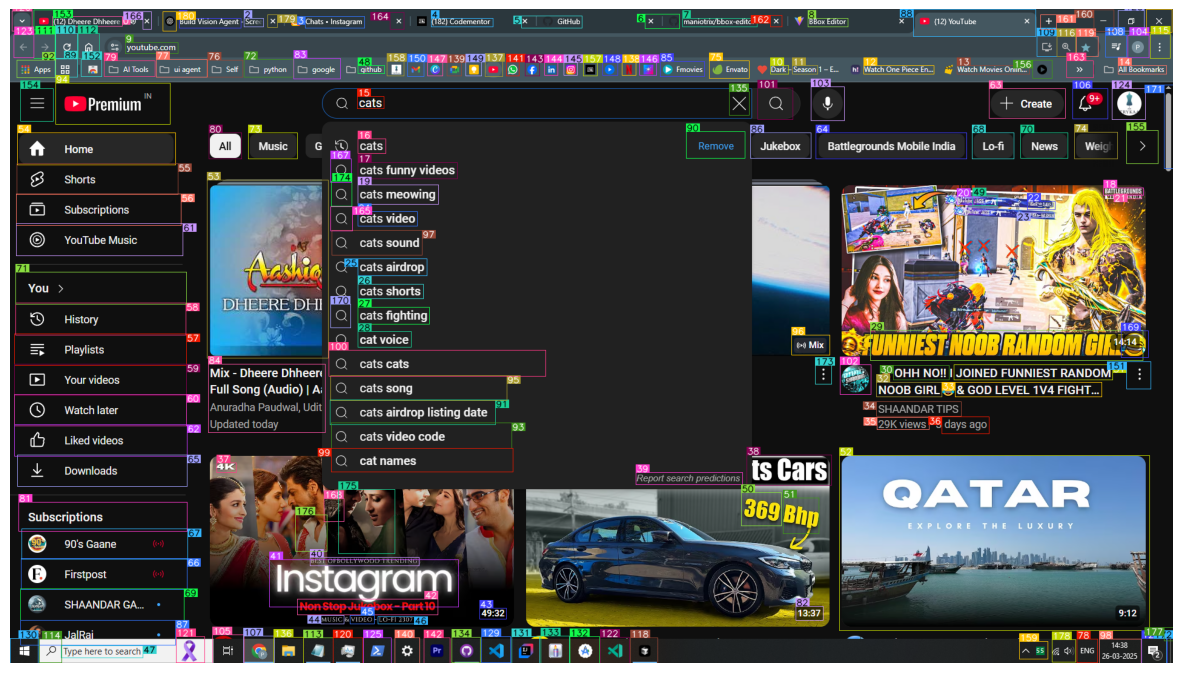

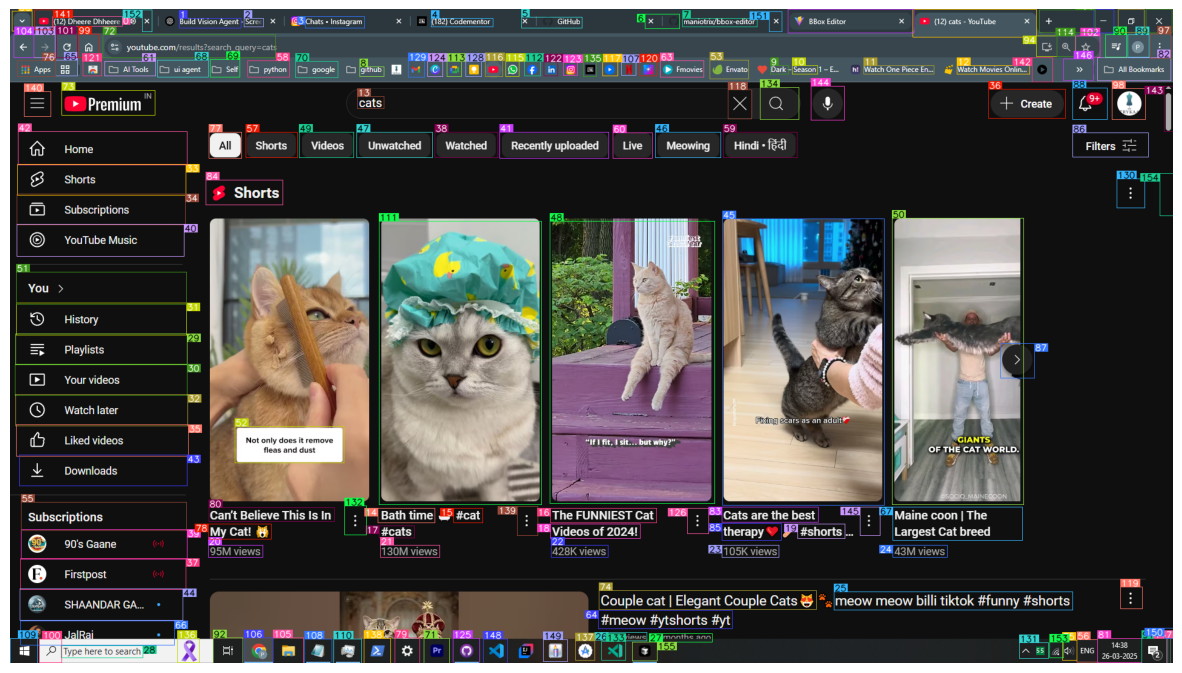

In [10]:
import base64
import matplotlib.pyplot as plt
import io
from PIL import Image
def plot_base64_image(base64_image: str):
    plt.figure(figsize=(15,15))

    image = Image.open(io.BytesIO(base64.b64decode(base64_image)))
    plt.axis('off')

    plt.imshow(image)

def plot_dino_labled_img(omniparser_result_model: OmniParserResultModel):
    plot_base64_image(omniparser_result_model.omniparser_result.dino_labled_img)
for omniparser_result_model in omni_inference_data:
    plot_dino_labled_img(omniparser_result_model)


In [19]:
# list all parsed_content_results source types
for i, result in enumerate(omni_inference_data):
    sources = set() 
    for item in result.parsed_content_results:
        sources.add(item.source)
    print(f"Result {i} has sources: {sources}")


Result 0 has sources: {'box_ocr_content_ocr', 'box_yolo_content_yolo', 'box_yolo_content_ocr'}
Result 1 has sources: {'box_ocr_content_ocr', 'box_yolo_content_yolo', 'box_yolo_content_ocr'}
Result 2 has sources: {'box_ocr_content_ocr', 'box_yolo_content_yolo', 'box_yolo_content_ocr'}


In [15]:
for result in omni_inference_data:
    # Print each item in the parsed_content_list vertically
    for i, item in enumerate(result.parsed_content_results):
        print(f"Item {i}:")
        for key, value in item.to_dict().items():
            print(f"  {key}: {value}")
        print()  # Empty line between items

Item 0:
  type: text
  bbox: [0.03697916492819786, 0.012037036940455437, 0.0963541641831398, 0.026851851493120193]
  interactivity: False
  content: (12) Dheere Dhheere
  source: box_ocr_content_ocr
  id: 0

Item 1:
  type: text
  bbox: [0.14531250298023224, 0.013888888992369175, 0.19843749701976776, 0.028703704476356506]
  interactivity: False
  content: Build Vision Agent
  source: box_ocr_content_ocr
  id: 1

Item 2:
  type: text
  bbox: [0.20156249403953552, 0.013888888992369175, 0.21822915971279144, 0.026851851493120193]
  interactivity: False
  content: Scree
  source: box_ocr_content_ocr
  id: 2

Item 3:
  type: text
  bbox: [0.2536458373069763, 0.012037036940455437, 0.3046875, 0.029629629105329514]
  interactivity: False
  content: Chats * Instagram
  source: box_ocr_content_ocr
  id: 3

Item 4:
  type: text
  bbox: [0.3619791567325592, 0.013888888992369175, 0.4151041805744171, 0.026851851493120193]
  interactivity: False
  content: (182) Codementor
  source: box_ocr_content_oc

In [26]:
# show all ocr only items
for i, result in enumerate(omni_inference_data):
    text_items = []
    for item in result.parsed_content_results:
        if item.source == "box_ocr_content_ocr" or item.source == "box_yolo_content_ocr":
            text_items.append(item.content)
    if len(text_items) > 0:
        print(f"Result {i} has {len(text_items)} text items")
        for item in text_items:
            print(item)
        print("--------------------------------")




Result 0 has 92 text items
(12) Dheere Dhheere
Build Vision Agent
Scree
Chats * Instagram
(182) Codementor
X| GitHub
x | (3 maniotrixlbbox-editor
BBox Editor
Dark
Season
Watch One Piece Ena.
Watch Movies Onlin .
All Bookmarks
BLulegRouNDS
India
M7ios
IGREAMa
Favcraagt
UNNIEST NOOBRACTOMC[n2
Mix - Dheere Dhheere Se Meri Zindagi Mein Aana
Mix
NNX LXSY
HEMENESY
OHH NOI
JOINED FUNNIEST RANDOM
Full Song (Audio)
Aashiqui
Anuradha Paudwal;
NNX
LXSY, Best Phonk Music, ROUDS, and more
NOOB GIRL
& GOD LEVEL 1V4 FIGHT _
Anuradha Paudwal; Udit Narayan; Tanu Priyanka, and more
Updated today
SHAANDAR TIPS
Updated today
29K views
days ago
JalRai_
14.38
26-03-2025
github
Tguet
4K Ioizto BEST OFBOLLYWOOD TRENDING Instagram Non Stop Jukebox - Part10 49.32 MUSIC VIDEO LO-FI 2307 
Azslkiad DHEERE DHHEERE SE for ALL UPDATES Ttseriesa ( 
QATAR E X P L 0 R E T H E L U X U R Y 9:12 
Sedan that Eats Sports Cars 13.37 369 Bhp 
Batting 
Battlegrounds Mobile India 
T-Series 
Jukebox 
Home 
Bat-and-Ball Sports 
Sh

In [17]:
# search id from parsed_content_results
def search_id_from_parsed_content_results(id: int, 
                                        result: OmniParserResultModel,
                                        interactive: bool = True):
    for i, item in enumerate(result.parsed_content_results):
        # print(f"Checking item {i}: id={item.id}, interactivity={item.interactivity}")
        # print(type(item.id))
        if item.id == id and item.interactivity == interactive:
            print(f"Found matching item: {item}")
            return item
    print("No matching item found")
    return None

result = search_id_from_parsed_content_results(34, omni_inference_data[0], interactive=False)
print("Returned value:")
for key, value in result.to_dict().items():
            print(f"  {key}: {value}")




Found matching item: ParsedContentResult(type='text', bbox=[0.7447916865348816, 0.6000000238418579, 0.8177083134651184, 0.6222222447395325], interactivity=False, content='SHAANDAR TIPS', source='box_ocr_content_ocr', id=34)
Returned value:
  type: text
  bbox: [0.7447916865348816, 0.6000000238418579, 0.8177083134651184, 0.6222222447395325]
  interactivity: False
  content: SHAANDAR TIPS
  source: box_ocr_content_ocr
  id: 34


In [ ]:
parsed_result_item: OmniParserResultModel = omni_inference_data[0]

from omni_helper import update_omniparser_result_model
id_to_update = 135
print(f"Updating omniparser result model for id {id_to_update}")
parsed_result_item = update_omniparser_result_model(parsed_result_item, id_to_update, update_content="Menu")

new_result = search_id_from_parsed_content_results(135, omni_inference_data[0])
print("new result:  ")
for key, value in new_result.to_dict().items():
    print(f"  {key}: {value}")






In [ ]:
# append a new item to omniparser result model
from omni_helper import append_omniparser_result_model
parsed_result_item: OmniParserResultModel = omni_inference_data[0]


new_item_details = {
    "content": "Menu2",
    "bbox": [0.008861908689141273, 0.12109177559614182, 0.03770790621638298, 0.1731482893228531],
    "interactivity": True,
    "source": "box_yolo_content_yolo",
    "type": "icon"
}

parsed_result_item = append_omniparser_result_model(parsed_result_item, 
                                                    new_item_details['content'],
                                                    new_item_details['bbox'],
                                                    new_item_details['interactivity'],
                                                    new_item_details['source'],
                                                    new_item_details['type']
                                                    )

print("Appended result:  ")
for key, value in parsed_result_item.parsed_content_results[-1].to_dict().items():
    print(f"  {key}: {value}")


In [10]:
# from omni_helper import delete_item_from_omniparser_result_model
# omni_result_item = omni_inference_data[0]
# id_to_delete = omni_result_item.parsed_content_results[-1].id
# delete_item_from_omniparser_result_model(omni_result_item, id_to_delete)
# print("Successfully deleted item with id: ", id_to_delete)


image size:  1920 1080


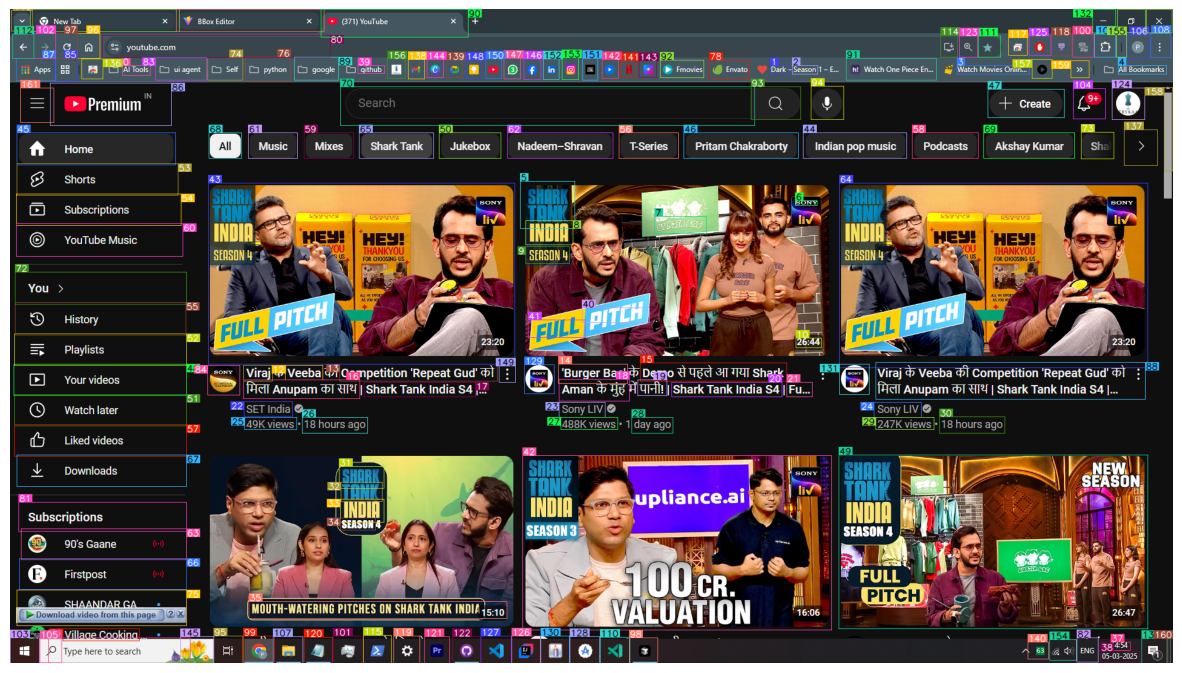

In [11]:
from omni_helper import annotate_omniparser_result_model

b64_iamge = annotate_omniparser_result_model(omni_inference_data[0])

plot_base64_image(b64_iamge)
